In [1]:
### Importing required Python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
#loading the data
insurance = pd.read_csv('C:/Users/Fadilah Thasnim/Desktop/Academics/6 - Semester/3. ML/Lab/Linear_Regression/insurance_data.csv')
insurance.head()

,bmi,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
0,23.21,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,1121.8739
1,30.14,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,1131.5066
2,33.33,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,1135.9407
3,33.66,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,1136.3994
4,34.10,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,1137.0110


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bmi                              1335 non-null   float64
 1   smoker                           1338 non-null   object 
 2   Claim_Amount                     1324 non-null   float64
 3   past_consultations               1332 non-null   float64
 4   num_of_steps                     1335 non-null   float64
 5   Hospital_expenditure             1334 non-null   float64
 6   NUmber_of_past_hospitalizations  1336 non-null   float64
 7   Anual_Salary                     1332 non-null   float64
 8   charges                          1338 non-null   float64
dtypes: float64(8), object(1)
memory usage: 94.2+ KB


C:\Users\Fadilah Thasnim\AppData\Local\Temp\ipykernel_19500\1568736306.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=insurance['smoker'])


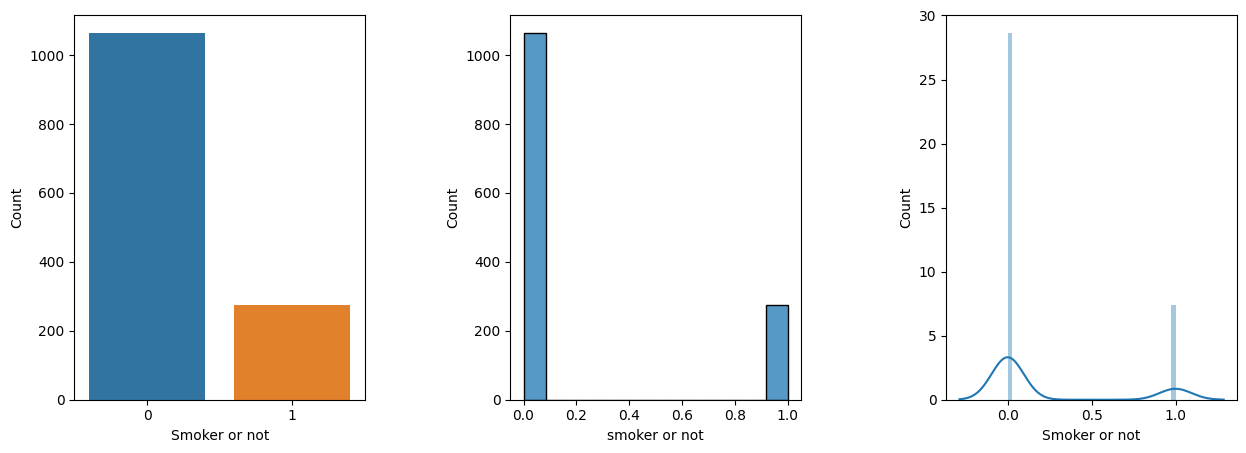

In [5]:
#distribution of smokers column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
insurance['smoker'] = le.fit_transform(insurance['smoker'])
insurance['smoker'] = insurance['smoker'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['smoker'])
plt.xlabel('Smoker or not')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['smoker'])
plt.xlabel('Smoker or not')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

C:\Users\Fadilah Thasnim\AppData\Local\Temp\ipykernel_19500\545706846.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=ins_dum['Anual_Salary'], bins=10)


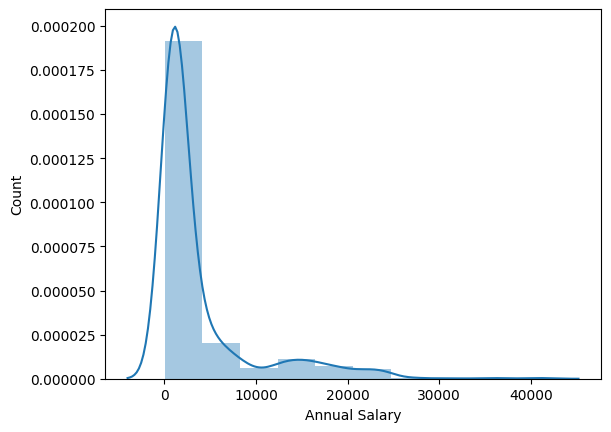

In [6]:
#distribution of annual salary 
ins_dum = insurance.copy()
ins_dum['Anual_Salary'] = ins_dum['Anual_Salary'].div(100000).round(2)
sns.distplot(x=ins_dum['Anual_Salary'], bins=10)
plt.xlabel('Annual Salary')
plt.ylabel('Count')
plt.show()

<Figure size 1000x500 with 0 Axes>

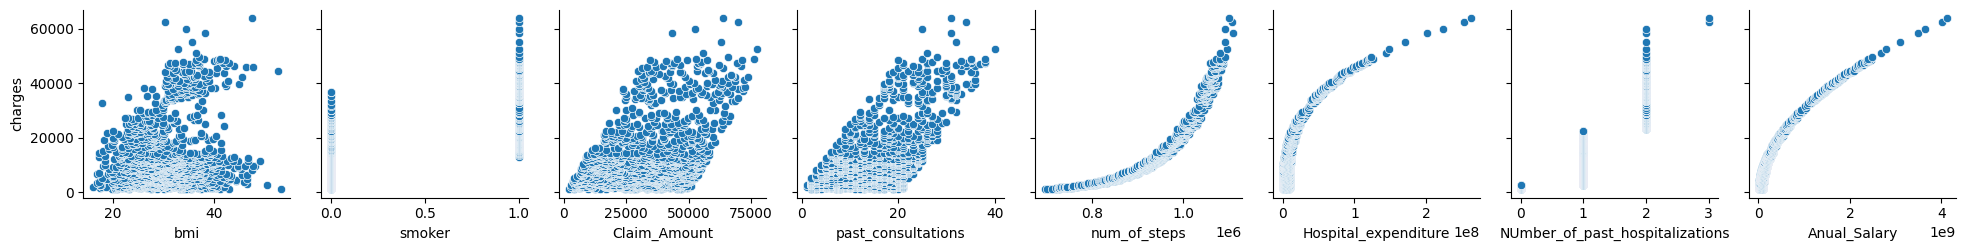

In [7]:
plt.figure(figsize=(10,5))
sns.pairplot(data=insurance, y_vars=['charges'], x_vars=['bmi','smoker', 
                                                         'Claim_Amount',
                                                         'past_consultations',
                                                         'num_of_steps',
                                                         'Hospital_expenditure',
                                                         'NUmber_of_past_hospitalizations',
                                                         'Anual_Salary'])

In [8]:
#processing the data to fill the missing data
insurance.isna().sum()

bmi                                 3
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
charges                             0
dtype: int64

In [9]:
#affter filling data in blank spaces

insurance['bmi'] = insurance['bmi'].fillna(insurance['bmi'].mean())
insurance['Claim_Amount'] = insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].mean())
insurance['past_consultations'] = insurance['past_consultations'].fillna(insurance['past_consultations'].mean())
insurance['num_of_steps'] = insurance['num_of_steps'].fillna(insurance['num_of_steps'].mean())
insurance['Hospital_expenditure'] = insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations'] = insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary'] = insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())

insurance.isna().sum()

bmi                                0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
charges                            0
dtype: int64

In [10]:
## finiding the correlation to decide the columns to take for Linear Regression
correlation = insurance.corr()
correlation

,bmi,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
bmi,1.000000,0.003610,0.093313,0.130667,0.135903,0.256892,0.137043,0.241505,0.198691
smoker,0.003610,1.000000,0.334406,0.502836,0.665711,0.662698,0.588682,0.739676,0.787251
Claim_Amount,0.093313,0.334406,1.000000,0.271482,0.398342,0.369921,0.379889,0.403974,0.435635
past_consultations,0.130667,0.502836,0.271482,1.000000,0.559682,0.542172,0.500131,0.589304,0.627592
num_of_steps,0.135903,0.665711,0.398342,0.559682,1.000000,0.624835,0.845128,0.733685,0.889848
Hospital_expenditure,0.256892,0.662698,0.369921,0.542172,0.624835,1.000000,0.651827,0.957189,0.871796
NUmber_of_past_hospitalizations,0.137043,0.588682,0.379889,0.500131,0.845128,0.651827,1.000000,0.735802,0.820682
Anual_Salary,0.241505,0.739676,0.403974,0.589304,0.733685,0.957189,0.735802,1.000000,0.946398
charges,0.198691,0.787251,0.435635,0.627592,0.889848,0.871796,0.820682,0.946398,1.000000


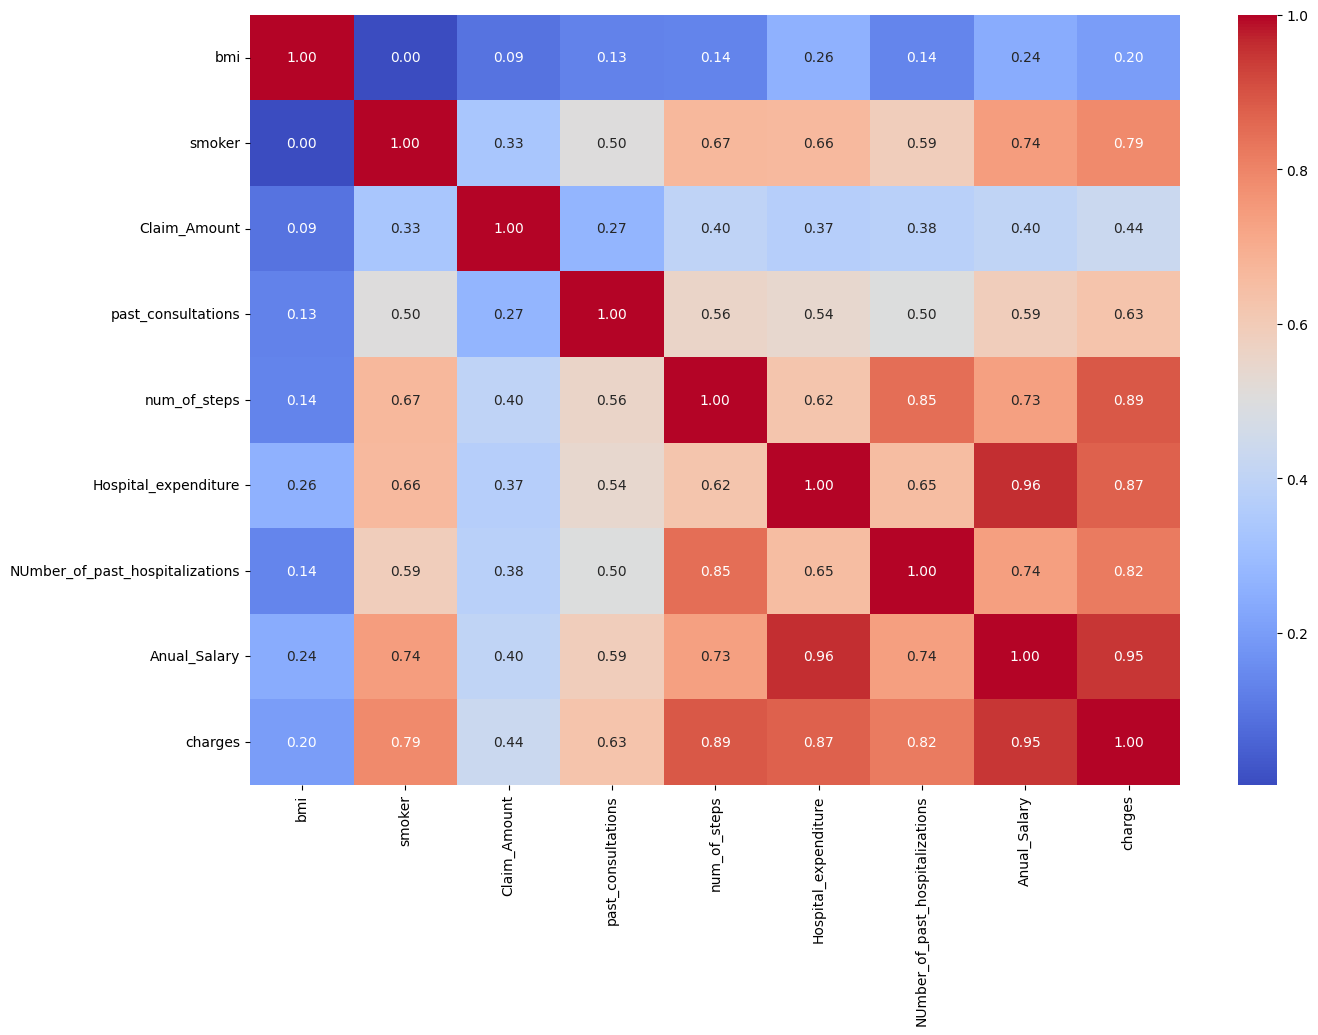

In [50]:
# in the below heatmap we can see the correlation of the different coloumns
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [12]:
### Inferences
### There is a strong to moderate correlation with the charges column with the following columns:
### smoker, past_consultations, num_of_steps, Hospital_expenditure, NUmber_of_past_hospitalizations, Anual_Salary

In [13]:
## splitting the data 
## X = insurance.drop(['bmi'], axis=1)

from sklearn.model_selection import train_test_split
X = insurance.iloc[:,0:8] # 0th column to 7th column 
y = insurance.iloc[:,-1]  # the 8th column - charges 
print(X.shape)
print(y.shape)

(1338, 8)
(1338,)


In [14]:
#splitting the data for model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# why we are scaling the data - StandardScaler removes the mean and scales each feature/variable to unit variance.

from sklearn.preprocessing import StandardScaler
#scaling the data 
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train_arr = y_train.values
y_train = y_train_arr.reshape((-1,1))

y_train = sc.fit_transform(y_train)

In [16]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
#fitting the model 
model.fit(X_train, y_train)

LinearRegression()

In [17]:
#predictions - of the Model for the given input  
predictions = model.predict(X_test)

#applying inverse scaling to bring it back to the original scale inorder to make predictions using original data
predictions = sc.inverse_transform(predictions)

In [18]:
#to check accuracy

print('coefficient', model.coef_) 
print('intercept', model.intercept_)

coefficient [[-5.18771410e-04  7.09838900e-02  1.05163942e-02  1.78011244e-02
   3.84363655e-01 -9.76307455e-02 -1.03402821e-02  7.02284345e-01]]
intercept [5.05985722e-16]


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import *
# mean_squared_error
print('mean_squared_error')
print(mean_squared_error(y_test, predictions, squared=False))
# r2_score
print('r2_score')
print(r2_score(y_test,predictions))
# mean_absolute_percentage_error
mape_on_test = mean_absolute_percentage_error(y_test, predictions)
print("mean absolute percentage error \n{}".format(mape_on_test))

mean_squared_error
2153.1860076628827
r2_score
0.970999441113728
mean absolute percentage error 
0.14933619692451347


In [26]:
# Checking for any NaN(Not A Number) values
nan_indices_x = np.isnan(X_test)
nan_indices_y = np.isnan(y_test)
print("NaN in test_x:", np.any(nan_indices_x))
print("NaN in test_y:", np.any(nan_indices_y))

NaN in test_x: False
NaN in test_y: False


In [47]:
# Assuming y_test is a Pandas Series
result = pd.DataFrame({'Actual_data': y_test.values, 'Prediction_data': predictions.flatten()})
error_pred = pd.DataFrame({'Actual_data': result['Actual_data'], 'Prediction_data': result['Prediction_data']})
error_pred['Error'] = error_pred['Actual_data'] - error_pred['Prediction_data']

#result is table containing actual and predicted data
result

,Actual_data,Prediction_data
0,10928.84900,10731.140615
1,12648.70340,11363.734377
2,12797.20962,11962.295225
3,44202.65360,43361.072690
4,3925.75820,4467.439730
...,...,...
263,2154.36100,1987.301646
264,8062.76400,8250.951931
265,7371.77200,8302.731310
266,7448.40395,7989.597004


In [48]:
#This column represents the difference between the actual values and the predicted values 
#It provides information about how much the model's predictions deviate from the actual values.
error_pred

,Actual_data,Prediction_data,Error
0,10928.84900,10731.140615,197.708385
1,12648.70340,11363.734377,1284.969023
2,12797.20962,11962.295225,834.914395
3,44202.65360,43361.072690,841.580910
4,3925.75820,4467.439730,-541.681530
...,...,...,...
263,2154.36100,1987.301646,167.059354
264,8062.76400,8250.951931,-188.187931
265,7371.77200,8302.731310,-930.959310
266,7448.40395,7989.597004,-541.193054


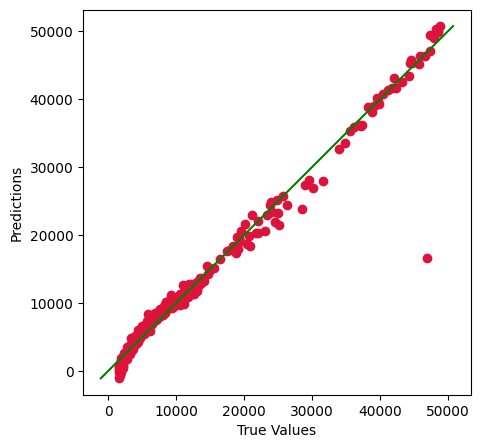

In [51]:
#the factors depending and linear regression

plt.figure(figsize=(5,5))
plt.scatter(result['Actual_data'], result['Prediction_data'], c='crimson')

p1 = max(max(result['Prediction_data']), max(result['Actual_data']))
p2 = min(min(result['Prediction_data']), min(result['Actual_data']))
plt.plot([p1, p2], [p1, p2], '-g')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

sir i had submitted before but i edited the pdf again and resubmitting please consider 

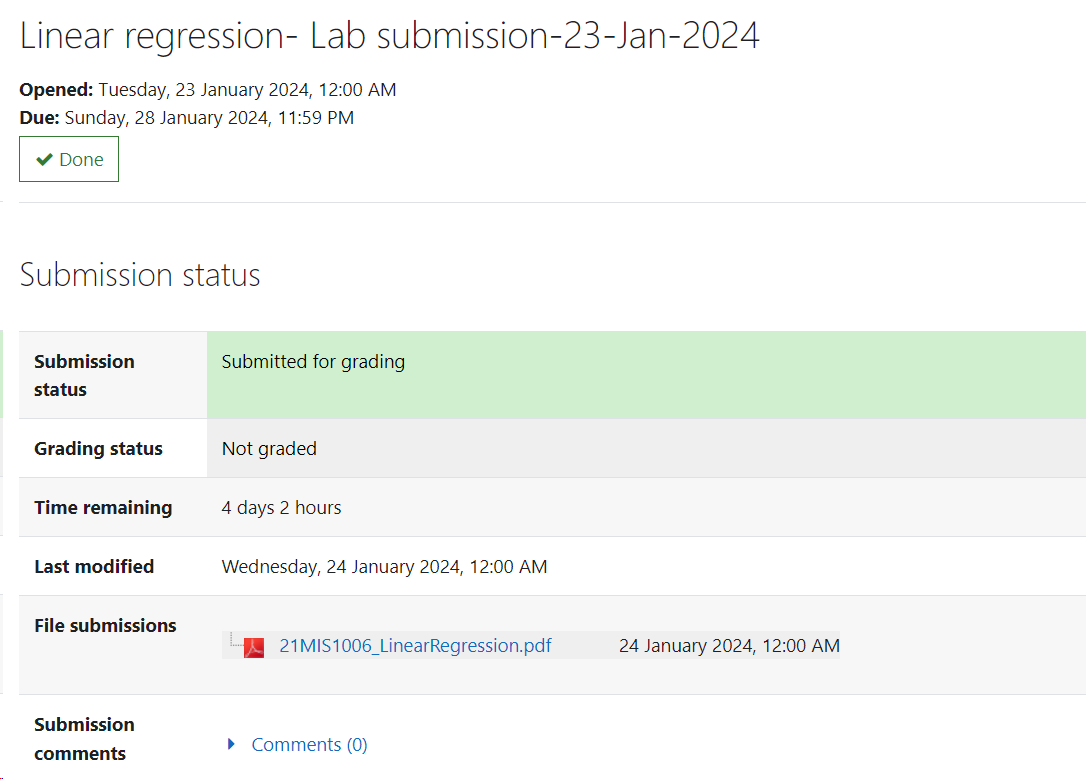